# Proyek Analisis Data: Bike-Sharing-Dataset
- **Nama:** Dion Prayoga
- **Email:** donpr2003@gmail.com
- **ID Dicoding:** dionp3

## Menentukan Pertanyaan Bisnis

- Apakah jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan hari libur?
- Seperti apa pola penyewaan sepeda sepanjang hari berdasarkan jam?

## Import Semua Packages/Library yang Digunakan

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Tabel Day

Memuat dataset

Kode ini digunakan untuk memuat dataset dari file CSV yang telah disimpan di drive. Setelah data berhasil dibaca, lima baris pertama akan ditampilkan untuk memberikan gambaran mengenai struktur dan isi dataset.

In [10]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Tabel Hour

Memuat dataset

Kode ini digunakan untuk memuat dataset dari file CSV yang telah disimpan di drive. Setelah data berhasil dibaca, lima baris pertama akan ditampilkan untuk memberikan gambaran mengenai struktur dan isi dataset.

In [11]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**  
- Tabel **Day** menyajikan data mengenai jumlah penyewaan sepeda yang tercatat setiap hari.  
- Tabel **Hour** berisi informasi jumlah penyewaan sepeda yang terjadi pada setiap jam dalam sehari.

### Assessing Data

Tabel Day

Memeriksa struktur data untuk memahami skema dataset.

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Memeriksa nilai yang hilang (missing values) guna memastikan kelengkapan data.

In [18]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Mendeteksi data duplikat untuk menjaga keakuratan analisis.

In [24]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())


Jumlah duplikasi:  0


In [16]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tabel hour

Memeriksa struktur data untuk memahami skema dataset.

In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Memeriksa nilai yang hilang (missing values) guna memastikan kelengkapan data.

In [19]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Mendeteksi data duplikat untuk menjaga keakuratan analisis.

In [23]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [22]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**📊 Insight:**  

🔹 **Tabel Day:**  
   - **Tipe Data:** Sebagian besar sudah sesuai, namun kolom `dteday` sebaiknya dikonversi ke format *datetime*.  
   - **Missing Value:** Tidak ditemukan nilai yang hilang.  
   - **Duplicate Data:** Tidak ada data duplikat.  

🔹 **Tabel Hour:**  
   - **Tipe Data:** Sebagian besar sudah sesuai, tetapi kolom `dteday` sebaiknya dikonversi ke format *datetime*.  
   - **Missing Value:** Tidak ditemukan nilai yang hilang.  
   - **Duplicate Data:** Tidak ada data duplikat.  

### Cleaning Data

Tabel Day

Mengonversi kolom `dteday` dari tipe data *object* menjadi *datetime* untuk mempermudah analisis waktu.

In [26]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

Melakukan pengecekan ulang terhadap struktur data.

In [27]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Tabel Hour

Mengonversi kolom `dteday` dari tipe data *object* menjadi *datetime* untuk mempermudah analisis waktu.

In [28]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

Melakukan pengecekan ulang terhadap struktur data.

In [29]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**  
- **Tabel Day:** Kolom **dteday** telah dikonversi ke format **datetime** untuk mempermudah analisis berbasis waktu.  
- **Tabel Hour:** Kolom **dteday** telah dikonversi ke format **datetime** agar lebih sesuai untuk analisis data berdasarkan waktu.

## Exploratory Data Analysis (EDA)

### Explore ...

Tabel Day

Menampilkan deskripsi data secara keseluruhan

In [30]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Menampilkan rata - rata jumlah penyewaan sepeda di hari libur dan hari biasa

In [ ]:
regular_day_df = day_df[day_df['holiday'] == 0]

average_regular_day_rentals = regular_day_df['cnt'].mean()
print("Rata-rata jumlah sewa sepeda di hari biasa:", average_regular_day_rentals)

Rata-rata jumlah sewa sepeda di hari biasa: 4527.104225352113


In [66]:
holiday_df = day_df[day_df['holiday'] == 1]

average_holiday_rentals = holiday_df['cnt'].mean()
print("Rata-rata jumlah sewa sepeda di hari libur:", average_holiday_rentals)

Rata-rata jumlah sewa sepeda di hari libur: 3735.0


In [33]:
day_df.groupby("holiday")["cnt"].mean()

holiday
0    4527.104225
1    3735.000000
Name: cnt, dtype: float64

Menyajikan statistik deskriptif untuk data jumlah penyewaan sepeda.

In [34]:
day_df['cnt'].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

Tabel Hour

Menampilkan deskripsi data secara keseluruhan

In [37]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Menampilkan rata - rata jumlah penyewaan sepeda berdasarkan perjam dalam sehari

In [40]:
average_hourly_rentals = hour_df.groupby('hr')['cnt'].mean().sort_values(ascending=False)
print(average_hourly_rentals)

hr
17    461.452055
18    425.510989
8     359.011004
16    311.983562
19    311.523352
13    253.661180
12    253.315934
15    251.233196
14    240.949246
20    226.030220
9     219.309491
7     212.064649
11    208.143054
10    173.668501
21    172.314560
22    131.335165
23     87.831044
6      76.044138
0      53.898072
1      33.375691
2      22.869930
5      19.889819
3      11.727403
4       6.352941
Name: cnt, dtype: float64


Mengelompokkan waktu dalam sehari berdasarkan kolom hr (jam), lalu menghitung rata-rata jumlah penyewaan sepeda untuk setiap kategori waktu.

In [42]:
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Pagi'
    elif 12 <= hour < 17:
        return 'Siang'
    elif 17 <= hour < 21:
        return 'Sore'
    else:
        return 'Malam'

hour_df['time_of_day'] = hour_df['hr'].apply(time_of_day)

average_rentals_by_time_of_day = hour_df.groupby('time_of_day')['cnt'].mean()
print(average_rentals_by_time_of_day)

time_of_day
Malam     65.687968
Pagi     181.520583
Siang    262.244719
Sore     356.201441
Name: cnt, dtype: float64


**Insight:**

#### **Tabel Day (Penyewaan Sepeda per Hari)**  
1. **Hari Biasa vs. Hari Libur**  
   - Rata-rata penyewaan sepeda pada **hari biasa** lebih tinggi (**4,527 sepeda**) dibandingkan **hari libur** (**3,735 sepeda**).  
   - Ini menunjukkan bahwa sepeda lebih sering digunakan untuk aktivitas rutin seperti bekerja atau sekolah.  

2. **Statistik Deskriptif Penyewaan Harian**  
   - **Rata-rata** penyewaan sepeda per hari adalah **4,504 sepeda** dengan **standar deviasi 1,937**, menunjukkan variasi cukup besar dalam jumlah penyewaan harian.  
   - **Jumlah minimum** penyewaan dalam satu hari hanya **22 sepeda**, sedangkan **jumlah maksimum** mencapai **8,714 sepeda**.  
   - **50% (median)** penyewaan sepeda berada di angka **4,548 sepeda**, menunjukkan distribusi cukup seimbang.  

---

#### **Tabel Hour (Penyewaan Sepeda per Jam)**  
1. **Jam-Jam Tersibuk**  
   - **Penyewaan sepeda tertinggi terjadi pada pukul 17:00 (461 penyewaan) dan 18:00 (425 penyewaan)**, menunjukkan bahwa sore hari adalah waktu tersibuk, kemungkinan besar karena jam pulang kerja/sekolah.  
   - **Pagi hari sekitar pukul 08:00 juga menunjukkan angka tinggi (359 penyewaan)**, kemungkinan karena aktivitas berangkat kerja/sekolah.  

2. **Jam-Jam Sepi**  
   - **Penyewaan terendah terjadi pada pukul 3:00 - 4:00 pagi (hanya 6-12 penyewaan)**, karena ini merupakan waktu dini hari saat aktivitas masyarakat sangat minim.  
   - **Setelah pukul 22:00, jumlah penyewaan mulai turun drastis**, menandakan bahwa sepeda jarang digunakan pada malam hari.  

3. **Pola Penyewaan Berdasarkan Waktu dalam Sehari**  
   - **Malam**: Rata-rata penyewaan hanya **65 sepeda**, menunjukkan aktivitas yang sangat rendah.  
   - **Pagi**: Rata-rata penyewaan naik menjadi **181 sepeda**, dengan puncak pada jam kerja/sekolah.  
   - **Siang**: Penyewaan meningkat ke **262 sepeda**, mencerminkan aktivitas santai atau istirahat siang.  
   - **Sore**: Penyewaan tertinggi, mencapai **356 sepeda**, sesuai dengan jam pulang kerja/sekolah.  

---

### **Kesimpulan**  
Sepeda lebih banyak digunakan pada **hari biasa** dibandingkan **hari libur**, menunjukkan bahwa sepeda digunakan sebagai alat transportasi harian.  
**Sore hari (jam pulang kerja/sekolah) adalah waktu tersibuk**, sedangkan **malam hari adalah waktu tersantai** dengan jumlah penyewaan yang sangat rendah.  
**Jam sibuk pagi (08:00) dan sore (17:00-18:00) menunjukkan pola penggunaan sepeda yang erat dengan aktivitas kerja/sekolah**.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Apakah jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan hari libur?

Membuat visualisasi hari biasa dan hari libur terhadap jumlah peminjaman sepeda menggunakan barplot

C:\Users\donpr\AppData\Local\Temp\ipykernel_135952\631030492.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Hari Biasa', 'Hari Libur'], y=[average_regular_day_rentals, average_holiday_rentals], palette=['blue', 'yellow'])


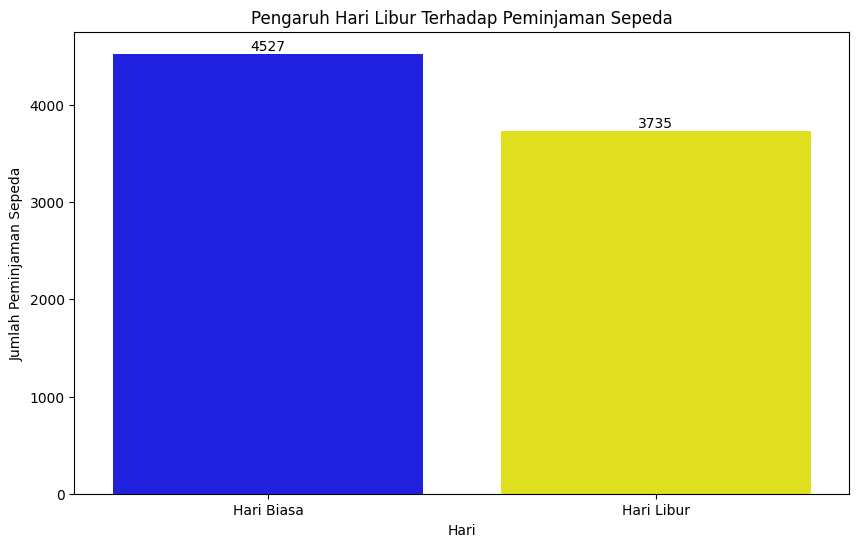

In [53]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=['Hari Biasa', 'Hari Libur'], y=[average_regular_day_rentals, average_holiday_rentals], palette=['blue', 'yellow'])
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.title('Pengaruh Hari Libur Terhadap Peminjaman Sepeda')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.xlabel('Hari')
plt.show()

### **Analisis Penyewaan Sepeda Hari Biasa vs Hari Libur**  

#### **Perbandingan Jumlah Penyewaan**  
- **Hari biasa** memiliki rata-rata penyewaan sekitar **4.527 sepeda per hari**.  
- **Hari libur** memiliki rata-rata penyewaan lebih rendah, yaitu **3.735 sepeda per hari**.  

#### **Analisis Tren**  
- Penyewaan sepeda **lebih tinggi pada hari kerja** dibandingkan dengan hari libur.  
- Hal ini disebabkan oleh aktivitas rutin seperti **perjalanan ke kantor atau sekolah** yang lebih dominan pada hari biasa.  
- **Pada hari libur, jumlah penyewaan menurun**, kemungkinan karena lebih sedikit orang yang bepergian untuk keperluan harian.  

#### **Interpretasi Visualisasi**  
- **Selisih antara penyewaan di hari biasa dan hari libur cukup signifikan**, yaitu sekitar **792 sepeda per hari**.  
- Hal ini menunjukkan bahwa penyewaan sepeda memiliki pola penggunaan yang lebih terkait dengan aktivitas harian daripada rekreasi.  

### Pertanyaan 2:

Seperti apa pola penyewaan sepeda sepanjang hari berdasarkan jam?

Visualisasi Pola Penggunaan Sepeda Berdasarkan Waktu

C:\Users\donpr\AppData\Local\Temp\ipykernel_135952\2088615895.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=average_hourly_rentals.index, y=average_hourly_rentals.values, palette='viridis')


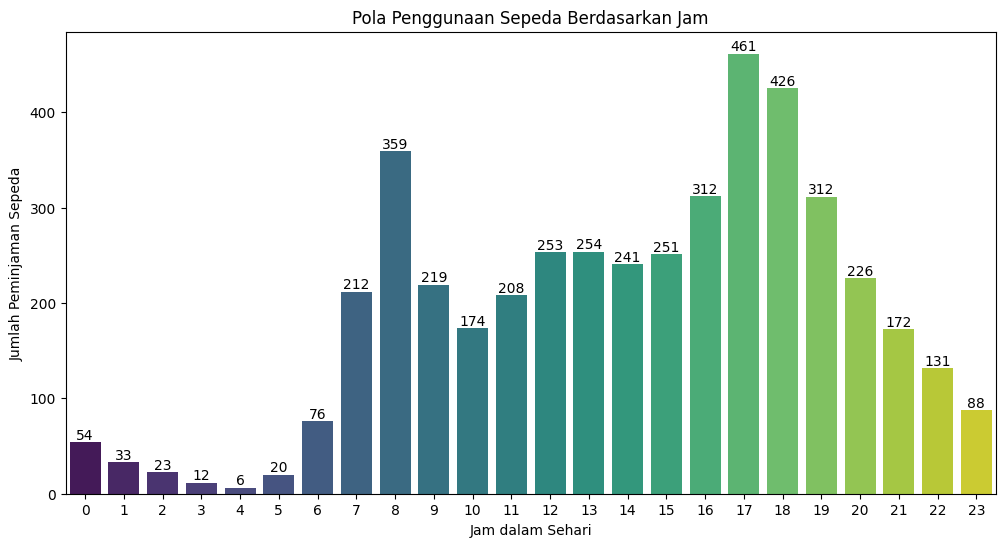

In [54]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=average_hourly_rentals.index, y=average_hourly_rentals.values, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.title('Pola Penggunaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

### **Analisis Penyewaan Sepeda per Jam**  

#### **Jam-Jam Tersibuk**  
- Puncak penyewaan terjadi pada **pukul 17:00 (461 penyewaan) dan 18:00 (425 penyewaan)**, menunjukkan **waktu pulang kerja/sekolah** sebagai periode tersibuk.  
- Pagi hari, terutama **pukul 08:00 (359 penyewaan)**, juga menunjukkan lonjakan aktivitas, kemungkinan karena **waktu berangkat kerja/sekolah**.  

#### **Jam-Jam Sepi**  
- Penyewaan **terendah terjadi antara pukul 03:00 - 04:00** (hanya **6-12 penyewaan**), karena ini merupakan waktu dini hari dengan aktivitas minimal.  
- Setelah **pukul 22:00**, jumlah penyewaan mulai turun drastis, menandakan bahwa sepeda jarang digunakan pada malam hari.  

#### **Pola Penyewaan Berdasarkan Waktu dalam Sehari**  
- **Malam:** Rata-rata hanya **65 penyewaan**, menunjukkan aktivitas yang sangat rendah.  
- **Pagi:** Penyewaan meningkat menjadi **181 sepeda**, dengan puncak pada jam kerja/sekolah.  
- **Siang:** Aktivitas penyewaan naik ke **262 sepeda**, kemungkinan karena istirahat siang atau aktivitas santai.  
- **Sore:** Waktu tersibuk dengan **rata-rata 356 penyewaan**, menandakan periode pulang kerja/sekolah sebagai puncak aktivitas.  

**Insight:**

#### **Penyewaan Sepeda Berdasarkan Hari (Hari Biasa vs. Hari Libur)**  
- Penyewaan sepeda **lebih tinggi pada hari biasa** dibandingkan hari libur, dengan selisih sekitar **792 penyewaan per hari**.  
- Hal ini menunjukkan bahwa sepeda lebih sering digunakan untuk keperluan **perjalanan kerja atau sekolah** dibandingkan rekreasi.  
- **Hari libur mengalami penurunan penyewaan**, kemungkinan karena masyarakat lebih sedikit bepergian atau memilih moda transportasi lain.  

#### **Pola Penyewaan Sepeda Berdasarkan Jam**  
- **Puncak penyewaan terjadi di pagi hari (08:00) dan sore hari (17:00 - 18:00)**, sesuai dengan jam sibuk kerja/sekolah.  
- **Setelah pukul 22:00, jumlah penyewaan turun drastis**, menunjukkan bahwa sepeda jarang digunakan di malam hari.  
- **Jam tersibuk adalah sore hari dengan rata-rata 356 penyewaan**, menandakan bahwa perjalanan pulang kerja/sekolah menjadi momen utama penggunaan sepeda.  

#### **Pola Aktivitas Harian**  
- **Malam hari memiliki jumlah penyewaan paling sedikit (rata-rata 65 sepeda)**, menunjukkan rendahnya aktivitas pada waktu tersebut.  
- **Pagi dan siang hari memiliki peningkatan penyewaan**, tetapi **sore hari tetap menjadi puncak utama aktivitas penyewaan sepeda**.  
- Data ini dapat digunakan untuk **optimasi ketersediaan sepeda** di jam-jam sibuk serta memahami pola perjalanan pengguna.

## Analisis Lanjutan (RFM Analysis)

Analisis RFM

Analisis **Recency, Frequency, Monetary (RFM)** digunakan untuk memahami pola penyewaan sepeda berdasarkan hari dalam seminggu.  
Kode berikut menghitung:  
- **Recency (R)** → Seberapa lama sejak terakhir kali sepeda disewa pada setiap hari.  
- **Frequency (F)** → Seberapa sering penyewaan terjadi dalam seminggu.  
- **Monetary (M)** → Total jumlah penyewaan sepeda pada masing-masing hari.

In [64]:
df = day_df.copy()
recent_date = df["dteday"].max()

rfm_df = df.groupby(by="weekday", as_index=False).agg({
    "dteday": "max",
    "instant": "count",
    "cnt": "sum"
})

rfm_df.columns = ["weekday", "max_order_timestamp", "frequency", "monetary"]

rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date.date() - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

print(rfm_df)

   weekday  frequency  monetary  recency
0        0        105    444027        1
1        1        105    455503        0
2        2        104    469109        6
3        3        104    473048        5
4        4        104    485395        4
5        5        104    487790        3
6        6        105    477807        2


Penjelasan:
- Jumlah penyewaan sepeda tertinggi terjadi pada **hari Jumat** dengan **487.790 transaksi**.  
- Penyewaan terendah tercatat pada **hari Minggu**, yaitu **444.027 transaksi**.  
- **Frekuensi penyewaan relatif stabil**, berkisar antara **104-105 kali per hari**.  
- Informasi ini dapat dimanfaatkan untuk **mengoptimalkan ketersediaan sepeda** sesuai pola peminjaman harian.

Visualisasi analisis RFM

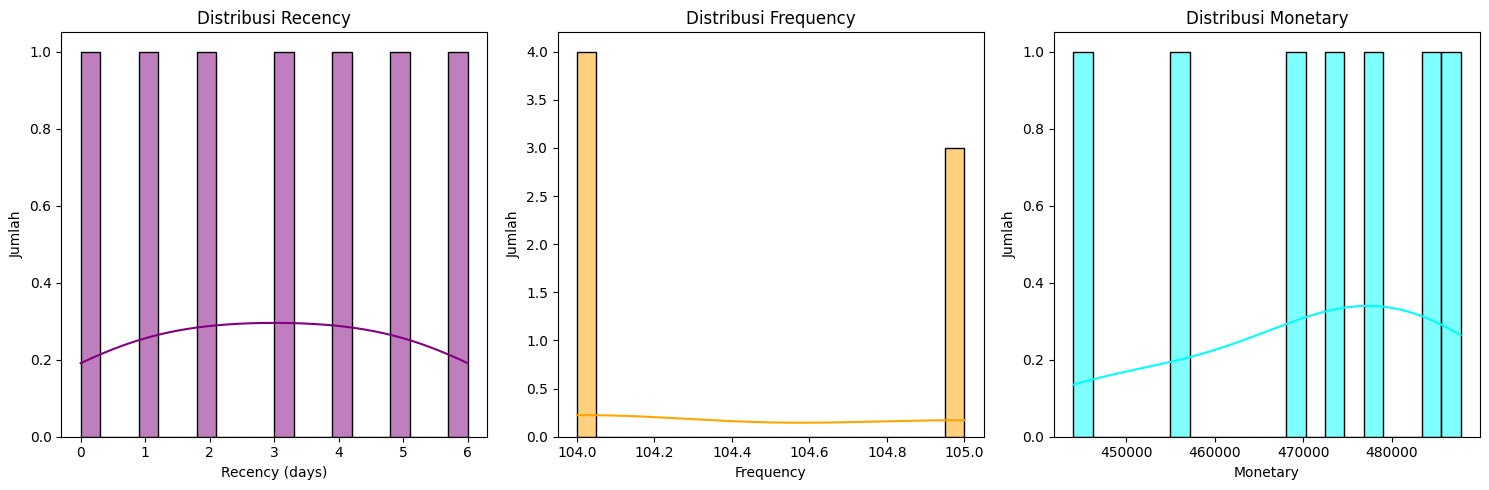

In [63]:
plt.figure(figsize=(15, 5))

# Histogram Recency
plt.subplot(1, 3, 1)
sns.histplot(rfm_df["recency"], bins=20, kde=True, color="purple")
plt.xlabel("Recency (days)")
plt.ylabel("Jumlah")
plt.title("Distribusi Recency")

# Histogram Frequency
plt.subplot(1, 3, 2)
sns.histplot(rfm_df["frequency"], bins=20, kde=True, color="orange")
plt.xlabel("Frequency")
plt.ylabel("Jumlah")
plt.title("Distribusi Frequency")

# Histogram Monetary
plt.subplot(1, 3, 3)
sns.histplot(rfm_df["monetary"], bins=20, kde=True, color="cyan")
plt.xlabel("Monetary")
plt.ylabel("Jumlah")
plt.title("Distribusi Monetary")

plt.tight_layout()
plt.show()


Berdasarkan analisis RFM (Recency, Frequency, Monetary), frekuensi penyewaan sepeda relatif konsisten di seluruh hari dalam seminggu, dengan sedikit variasi dalam total pendapatan (monetary). Selain itu, nilai recency yang rendah menunjukkan bahwa penyewaan sepeda terjadi secara aktif dan berkelanjutan di semua hari, mengindikasikan bahwa layanan ini digunakan secara rutin oleh pelanggan tanpa adanya jeda penggunaan yang signifikan.

## Conclusion

- Conclution pertanyaan 1
Rata-rata jumlah penyewaan sepeda pada hari kerja (4,527 penyewaan) lebih tinggi dibandingkan pada hari libur (3,735 penyewaan), menunjukkan bahwa sepeda lebih banyak digunakan sebagai moda transportasi harian dibandingkan untuk rekreasi.

- Conclution pertanyaan 2
Pola penyewaan sepeda menunjukkan dua puncak utama, yaitu pada pagi hari sekitar pukul 08:00 dan sore hari sekitar pukul 17:00–18:00, mencerminkan tingginya penggunaan sepeda untuk perjalanan menuju dan pulang dari tempat kerja atau sekolah, sementara penyewaan menurun pada siang dan dini hari.

In [62]:
all_df = pd.concat([day_df, hour_df], ignore_index=True)
all_df.to_csv("all_data.csv", index=False)